In [316]:
import pandas as pd  
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [317]:
dataset=pd.read_csv(r"C:\Users\lavan\Desktop\Real_Estate_Dataset\practice.csv")
dataset.head()

,Company_name,Project_name,Rooms,BHK,Type,Rera_Details,latitude,longitude,Price,Price_per_sft,Area_in_sft,Construction_Status,Bathrooms
0,VRL Constructions,VRL Happy Homes,2,BHK,Apartment,Yes,12.881938,77.788353,48.79 L,"4,538 / sq ft",1075,Under Construction,2 Bathrooms
1,Subram Builders Bangalore,Subram Jade Gardens,2,BHK,Apartment,Yes,13.045972,77.503059,1.06 Cr,"7,500 / sq ft",1416,Under Construction,2 Bathrooms
2,Prominent Infra,Prominent Chourasia Revanta,2,BHK,Apartment,Yes,13.014944,77.739006,79.98 L,"6,450 / sq ft",1240,Under Construction,2 Bathrooms
3,Bhuvesta Constructions,Bhuvesta Lourdes Nest,3,BHK,Apartment,Yes,13.013747,77.702782,1.15 Cr,"6,999 / sq ft",1656,Under Construction,2 Bathrooms
4,Trifecta Projects Pvt Ltd,Trifecta TRIFECTA VANTO PHASE 1,3,BHK,Apartment,Yes,12.881692,77.714157,1.24 Cr,"9,282 / sq ft",1340,Under Construction,2 Bathrooms


In [318]:
# Convert price which is in the lakhs and crores format into rupees
def convert_price(Price):
    raw_price=Price.split()
    converted=0
    if raw_price[1] == "L":
        converted_price=float(raw_price[0])*100000
    elif raw_price[1] == "Cr":
        converted_price=float(raw_price[0])*10000000
    else:
        converted_price=int(raw_price[0])
    return converted_price

In [319]:
dataset["Price"] = dataset["Price"].apply(convert_price)

In [320]:
#Remove "/ sq ft" in Price_per_sft column
def clean_value(Price_per_sft):
    pattern = r"[\d,]+"
    text = Price_per_sft
    match = re.search(pattern, text)
    if match:
        raw_string = match.group()
        clean_value = int(raw_string.replace(",",""))
        return clean_value

In [321]:
dataset["Price_per_sft"] = dataset["Price_per_sft"].apply(clean_value)

In [322]:
dataset.head(5)

,Company_name,Project_name,Rooms,BHK,Type,Rera_Details,latitude,longitude,Price,Price_per_sft,Area_in_sft,Construction_Status,Bathrooms
0,VRL Constructions,VRL Happy Homes,2,BHK,Apartment,Yes,12.881938,77.788353,4879000.0,4538,1075,Under Construction,2 Bathrooms
1,Subram Builders Bangalore,Subram Jade Gardens,2,BHK,Apartment,Yes,13.045972,77.503059,10600000.0,7500,1416,Under Construction,2 Bathrooms
2,Prominent Infra,Prominent Chourasia Revanta,2,BHK,Apartment,Yes,13.014944,77.739006,7998000.0,6450,1240,Under Construction,2 Bathrooms
3,Bhuvesta Constructions,Bhuvesta Lourdes Nest,3,BHK,Apartment,Yes,13.013747,77.702782,11500000.0,6999,1656,Under Construction,2 Bathrooms
4,Trifecta Projects Pvt Ltd,Trifecta TRIFECTA VANTO PHASE 1,3,BHK,Apartment,Yes,12.881692,77.714157,12400000.0,9282,1340,Under Construction,2 Bathrooms


In [323]:
#lets clean up the Bathrooms Column
def clean_string(Bathrooms):
    pattern = r"\d"
    text = Bathrooms
    match = re.search(pattern, text)
    if match:
        clean_string = match.group()
    return clean_string

In [324]:
dataset["Bathrooms"] = dataset["Bathrooms"].apply(clean_string)

In [325]:
#lets remove the redundant column BHK as its not adding any value to the data of "Rooms" already available (TT)
dataset = dataset.drop("BHK", axis = "columns")

In [326]:
dataset.head(5)

,Company_name,Project_name,Rooms,Type,Rera_Details,latitude,longitude,Price,Price_per_sft,Area_in_sft,Construction_Status,Bathrooms
0,VRL Constructions,VRL Happy Homes,2,Apartment,Yes,12.881938,77.788353,4879000.0,4538,1075,Under Construction,2
1,Subram Builders Bangalore,Subram Jade Gardens,2,Apartment,Yes,13.045972,77.503059,10600000.0,7500,1416,Under Construction,2
2,Prominent Infra,Prominent Chourasia Revanta,2,Apartment,Yes,13.014944,77.739006,7998000.0,6450,1240,Under Construction,2
3,Bhuvesta Constructions,Bhuvesta Lourdes Nest,3,Apartment,Yes,13.013747,77.702782,11500000.0,6999,1656,Under Construction,2
4,Trifecta Projects Pvt Ltd,Trifecta TRIFECTA VANTO PHASE 1,3,Apartment,Yes,12.881692,77.714157,12400000.0,9282,1340,Under Construction,2


In [327]:
dataset.Company_name = dataset.Company_name.map(lambda p : str(p).upper())
dataset.Project_name = dataset.Project_name.map(lambda p : str(p).upper())
dataset.head(5)

,Company_name,Project_name,Rooms,Type,Rera_Details,latitude,longitude,Price,Price_per_sft,Area_in_sft,Construction_Status,Bathrooms
0,VRL CONSTRUCTIONS,VRL HAPPY HOMES,2,Apartment,Yes,12.881938,77.788353,4879000.0,4538,1075,Under Construction,2
1,SUBRAM BUILDERS BANGALORE,SUBRAM JADE GARDENS,2,Apartment,Yes,13.045972,77.503059,10600000.0,7500,1416,Under Construction,2
2,PROMINENT INFRA,PROMINENT CHOURASIA REVANTA,2,Apartment,Yes,13.014944,77.739006,7998000.0,6450,1240,Under Construction,2
3,BHUVESTA CONSTRUCTIONS,BHUVESTA LOURDES NEST,3,Apartment,Yes,13.013747,77.702782,11500000.0,6999,1656,Under Construction,2
4,TRIFECTA PROJECTS PVT LTD,TRIFECTA TRIFECTA VANTO PHASE 1,3,Apartment,Yes,12.881692,77.714157,12400000.0,9282,1340,Under Construction,2


In [328]:
dataset.shape

(39936, 12)

In [329]:
column_to_describe = ["Rooms","Price_per_sft","Area_in_sft"]
dataset[column_to_describe].describe()

,Rooms,Price_per_sft,Area_in_sft
count,39936.000000,39936.000000,39936.000000
mean,2.741662,7589.230018,1757.453125
std,0.961871,4649.213759,3303.946537
min,1.000000,100.000000,108.000000
25%,2.000000,4650.000000,1200.000000
50%,3.000000,6785.500000,1400.000000
75%,3.000000,9660.000000,1886.000000
max,15.000000,127610.000000,348480.000000


In [330]:
dataset.dtypes

Company_name            object
Project_name            object
Rooms                    int64
Type                    object
Rera_Details            object
latitude               float64
longitude              float64
Price                  float64
Price_per_sft            int64
Area_in_sft              int64
Construction_Status     object
Bathrooms               object
dtype: object

In [331]:
#need to change bathrooms from object type to int type
dataset["Bathrooms"] = dataset["Bathrooms"].astype(int)

In [332]:
dataset.dtypes

Company_name            object
Project_name            object
Rooms                    int64
Type                    object
Rera_Details            object
latitude               float64
longitude              float64
Price                  float64
Price_per_sft            int64
Area_in_sft              int64
Construction_Status     object
Bathrooms                int32
dtype: object

In [333]:
from sklearn.model_selection import train_test_split
y=dataset.Price

In [334]:
dataset.columns

Index(['Company_name', 'Project_name', 'Rooms', 'Type', 'Rera_Details',
       'latitude', 'longitude', 'Price', 'Price_per_sft', 'Area_in_sft',
       'Construction_Status', 'Bathrooms'],
      dtype='object')

In [335]:
dataset_impute = dataset.copy()

In [336]:
data_features = ['Rooms','latitude', 'longitude', 'Price_per_sft', 'Area_in_sft', 'Bathrooms']
X=dataset_impute[data_features]
Train_X, Val_X, Train_y, Val_y = train_test_split(X,y, random_state=0)

In [337]:
X.describe()

,Rooms,latitude,longitude,Price_per_sft,Area_in_sft,Bathrooms
count,39936.000000,39936.000000,39936.000000,39936.000000,39936.000000,39936.000000
mean,2.741662,12.976484,77.659167,7589.230018,1757.453125,2.618990
std,0.961871,0.438982,0.306317,4649.213759,3303.946537,1.025096
min,1.000000,11.048909,72.471161,100.000000,108.000000,1.000000
25%,2.000000,12.868199,77.595459,4650.000000,1200.000000,2.000000
50%,3.000000,12.964378,77.661621,6785.500000,1400.000000,2.000000
75%,3.000000,13.050116,77.712639,9660.000000,1886.000000,3.000000
max,15.000000,30.378063,88.463371,127610.000000,348480.000000,9.000000


In [338]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [339]:
def get_mae_Forest(max_leaf_nodes, Train_X, Val_X, Train_y, Val_y):
    data_model=RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    data_model.fit(Train_X, Train_y)
    Predicted=data_model.predict(Val_X)
    mae=mean_absolute_error(Val_y, Predicted)
    return mae

In [340]:
for max_leaf_nodes in [5000,10000,12000,15000]:
    refined_mae=get_mae_Forest(max_leaf_nodes, Train_X, Val_X, Train_y, Val_y)
    print(f"For Max leaf node of {max_leaf_nodes} Mean Absolute Error is {refined_mae}")

For Max leaf node of 5000 Mean Absolute Error is 262909.7145668445
For Max leaf node of 10000 Mean Absolute Error is 257650.6617999564
For Max leaf node of 12000 Mean Absolute Error is 257641.11900283516
For Max leaf node of 15000 Mean Absolute Error is 257641.11900283516


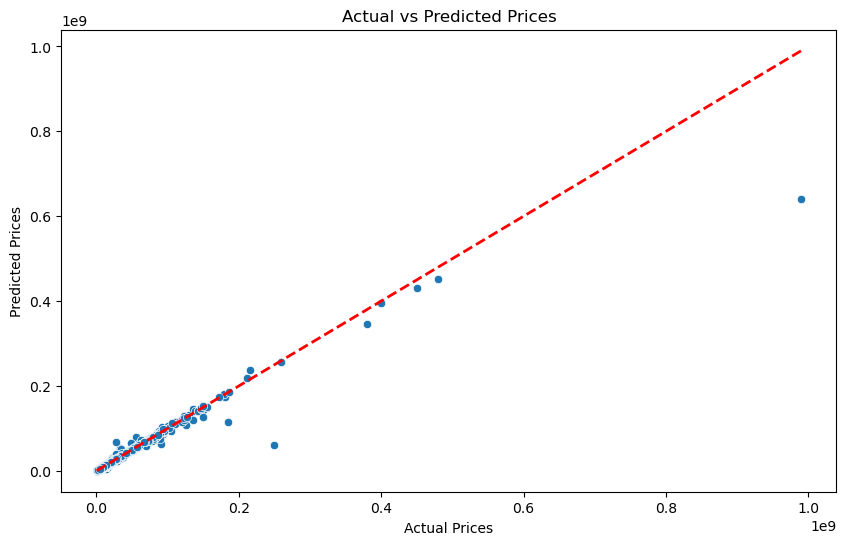

In [342]:
data_model=RandomForestRegressor(max_leaf_nodes=15000, random_state=1)
data_model.fit(Train_X, Train_y)
Predicted=data_model.predict(Val_X)
df_results = pd.DataFrame({'Actual': Val_y, 'Predicted': Predicted})
df_results.to_csv(r'C:\Users\lavan\Desktop\Portfolio Projects\House Pricing Prediction\prediction_1.csv', index=False)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Val_y, y=Predicted)
max_val = max(max(Val_y), max(Predicted))
min_val = min(min(Val_y), min(Predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [285]:
from sklearn.impute import SimpleImputer

In [286]:
my_imputer=SimpleImputer()
imputed_Train_X = pd.DataFrame(my_imputer.fit_transform(Train_X), columns=Train_X.columns)
imputed_Val_X = pd.DataFrame(my_imputer.transform(Val_X), columns=Val_X.columns)

In [287]:
for max_leaf_nodes in [5000,10000,12000,15000]:
    refined_mae=get_mae_Forest(max_leaf_nodes, imputed_Train_X, imputed_Val_X, Train_y, Val_y)
    print(f"For Max leaf node of {max_leaf_nodes} Mean Absolute Error is {refined_mae}")

For Max leaf node of 5000 Mean Absolute Error is 262909.7145668445
For Max leaf node of 10000 Mean Absolute Error is 257650.6617999564
For Max leaf node of 12000 Mean Absolute Error is 257641.11900283516
For Max leaf node of 15000 Mean Absolute Error is 257641.11900283516


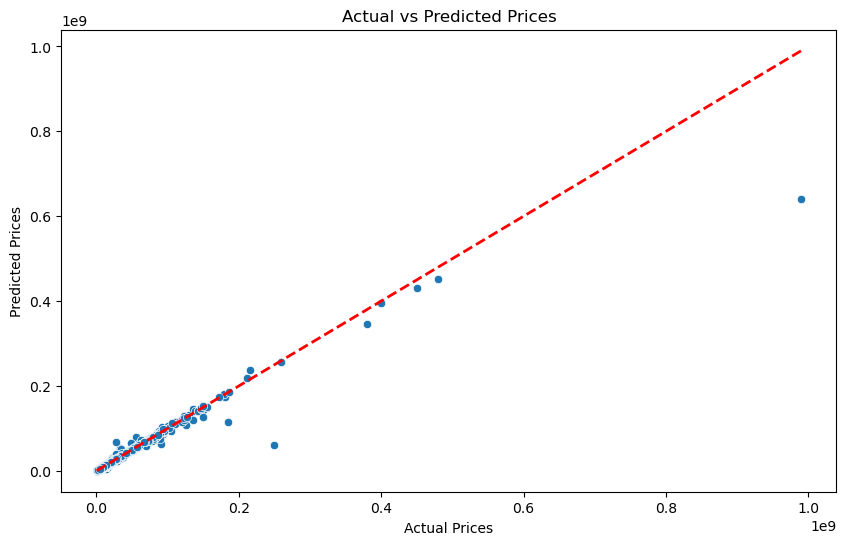

In [288]:
data_model=RandomForestRegressor(max_leaf_nodes=15000, random_state=1)
data_model.fit(imputed_Train_X, Train_y)
Predicted=data_model.predict(imputed_Val_X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Val_y, y=Predicted)
max_val = max(max(Val_y), max(Predicted))
min_val = min(min(Val_y), min(Predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [289]:
dataset.columns

Index(['Company_name', 'Project_name', 'Rooms', 'Type', 'Rera_Details',
       'latitude', 'longitude', 'Price', 'Price_per_sft', 'Area_in_sft',
       'Construction_Status', 'Bathrooms'],
      dtype='object')

In [290]:
dataset_drop_cat = dataset.copy()

In [291]:
data_features = ['Company_name', 'Project_name', 'Rooms', 'Type', 'Rera_Details',
       'latitude', 'longitude', 'Price', 'Price_per_sft', 'Area_in_sft',
       'Construction_Status', 'Bathrooms']
X=dataset_drop_cat[data_features]
y=dataset_drop_cat.Price
Train_X, Val_X, Train_y, Val_y = train_test_split(X,y, random_state=0)
Train_X.head()
Val_X.head()
Val_y.shape

(9984,)

In [292]:
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(cols_with_missing)
Train_X.drop(cols_with_missing, axis=1, inplace=True)
Val_X.drop(cols_with_missing, axis=1, inplace=True)

[]


In [293]:
low_cardinality_cols = [cname for cname in Train_X.columns if Train_X[cname].nunique() < 10 and Train_X[cname].dtype == "object"]
numerical_cols = [cname for cname in Train_X.columns if Train_X[cname].dtype in ["int64","float64","int32"]]
print(low_cardinality_cols)
print(numerical_cols)

['Type', 'Rera_Details', 'Construction_Status']
['Rooms', 'latitude', 'longitude', 'Price', 'Price_per_sft', 'Area_in_sft', 'Bathrooms']


In [294]:
final_cols = numerical_cols+low_cardinality_cols
print(final_cols)

['Rooms', 'latitude', 'longitude', 'Price', 'Price_per_sft', 'Area_in_sft', 'Bathrooms', 'Type', 'Rera_Details', 'Construction_Status']


In [295]:
def_Train_X=Train_X[final_cols].copy()
def_Train_X.head()

,Rooms,latitude,longitude,Price,Price_per_sft,Area_in_sft,Bathrooms,Type,Rera_Details,Construction_Status
28645,2,12.831991,77.660934,6150000.0,6000,1025,5,Apartment,Yes,Under Construction
2317,2,13.040371,77.652031,7068000.0,6194,1141,2,Apartment,No,Ready to move
37833,2,12.786186,77.702026,3500000.0,4375,800,2,Apartment,Yes,Under Construction
17020,1,12.933178,77.744591,7856000.0,9833,799,1,Apartment,Yes,Under Construction
1635,3,12.985364,77.550354,17000000.0,11500,1480,3,Apartment,No,Under Construction


In [296]:
def_Val_X=Val_X[final_cols].copy()
def_Val_X.head()

,Rooms,latitude,longitude,Price,Price_per_sft,Area_in_sft,Bathrooms,Type,Rera_Details,Construction_Status
23628,3,13.062951,77.660545,21400000.0,11931,1794,2,Apartment,No,Ready to move
37281,3,12.775427,77.703316,4798000.0,3998,1200,2,Residential Plot,No,New
13400,3,13.146082,77.638992,10200000.0,6840,1500,3,Apartment,Yes,Under Construction
24989,2,12.940064,77.733551,8260000.0,7000,1180,2,Apartment,No,Ready to move
16721,3,13.016540,77.728142,10000000.0,5040,2000,3,Apartment,Yes,Under Construction


In [297]:
def_Train_X.dtypes

Rooms                    int64
latitude               float64
longitude              float64
Price                  float64
Price_per_sft            int64
Area_in_sft              int64
Bathrooms                int32
Type                    object
Rera_Details            object
Construction_Status     object
dtype: object

In [298]:
s = (def_Train_X.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Type', 'Rera_Details', 'Construction_Status']


In [299]:
drop_Train_X = def_Train_X.select_dtypes(exclude="object")
drop_Val_X = def_Val_X.select_dtypes(exclude="object")
print(drop_Train_X.shape)
print(Train_y.shape)
print(drop_Val_X.shape)
print(Val_y.shape)

(29952, 7)
(29952,)
(9984, 7)
(9984,)


In [300]:
for max_leaf_nodes in [5000,10000,12000,15000]:
    refined_mae=get_mae_Forest(max_leaf_nodes, drop_Train_X, drop_Val_X, Train_y, Val_y)
    print(f"For Max leaf node of {max_leaf_nodes} Mean Absolute Error is {refined_mae}")

For Max leaf node of 5000 Mean Absolute Error is 47173.592748397445
For Max leaf node of 10000 Mean Absolute Error is 47173.592748397445
For Max leaf node of 12000 Mean Absolute Error is 47173.592748397445
For Max leaf node of 15000 Mean Absolute Error is 47173.592748397445


In [301]:
from sklearn.preprocessing import OrdinalEncoder
lable_Train_X = def_Train_X.copy()
lable_Val_X = def_Val_X.copy()
ordinal_encoder=OrdinalEncoder()
lable_Train_X[object_cols]=ordinal_encoder.fit_transform(Train_X[object_cols])
lable_Val_X[object_cols]=ordinal_encoder.transform(Val_X[object_cols])
lable_Train_X.head()

,Rooms,latitude,longitude,Price,Price_per_sft,Area_in_sft,Bathrooms,Type,Rera_Details,Construction_Status
28645,2,12.831991,77.660934,6150000.0,6000,1025,5,0.0,1.0,3.0
2317,2,13.040371,77.652031,7068000.0,6194,1141,2,0.0,0.0,1.0
37833,2,12.786186,77.702026,3500000.0,4375,800,2,0.0,1.0,3.0
17020,1,12.933178,77.744591,7856000.0,9833,799,1,0.0,1.0,3.0
1635,3,12.985364,77.550354,17000000.0,11500,1480,3,0.0,0.0,3.0


In [302]:
for max_leaf_nodes in [5000,10000,12000,15000]:
    refined_mae=get_mae_Forest(max_leaf_nodes, lable_Train_X, lable_Val_X, Train_y, Val_y)
    print(f"For Max leaf node of {max_leaf_nodes} Mean Absolute Error is {refined_mae}")

For Max leaf node of 5000 Mean Absolute Error is 46837.67427884616
For Max leaf node of 10000 Mean Absolute Error is 46837.67427884616
For Max leaf node of 12000 Mean Absolute Error is 46837.67427884616
For Max leaf node of 15000 Mean Absolute Error is 46837.67427884616


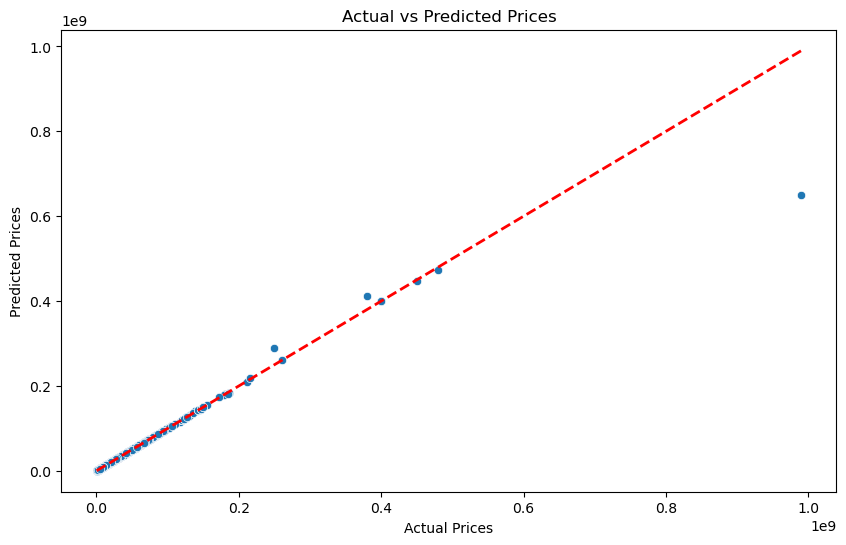

In [344]:
data_model=RandomForestRegressor(max_leaf_nodes=15000, random_state=1)
data_model.fit(lable_Train_X, Train_y)
Predicted=data_model.predict(lable_Val_X)
df_results = pd.DataFrame({'Actual': Val_y, 'Predicted': Predicted})
df_results.to_csv(r'C:\Users\lavan\Desktop\Portfolio Projects\House Pricing Prediction\prediction_2.csv', index=False)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Val_y, y=Predicted)
max_val = max(max(Val_y), max(Predicted))
min_val = min(min(Val_y), min(Predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [304]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown = "ignore", sparse_output = False)

In [305]:
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(def_Train_X[object_cols]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(def_Val_X[object_cols]))
OH_cols_train.index = def_Train_X.index
OH_cols_val.index = def_Val_X.index
num_Train_X = def_Train_X.drop(object_cols, axis=1)
num_Val_X = def_Val_X.drop(object_cols, axis=1)
OH_Train_X = pd.concat([num_Train_X, OH_cols_train], axis=1)
OH_Val_X = pd.concat([num_Val_X, OH_cols_val], axis=1)
OH_Train_X.columns = OH_Train_X.columns.astype(str)
OH_Val_X.columns = OH_Val_X.columns.astype(str)

In [306]:
for max_leaf_nodes in [5000,10000,12000,15000]:
    refined_mae=get_mae_Forest(max_leaf_nodes, OH_Train_X, OH_Val_X, Train_y, Val_y)
    print(f"For Max leaf node of {max_leaf_nodes} Mean Absolute Error is {refined_mae}")

For Max leaf node of 5000 Mean Absolute Error is 46481.70572916667
For Max leaf node of 10000 Mean Absolute Error is 46481.70572916667
For Max leaf node of 12000 Mean Absolute Error is 46481.70572916667
For Max leaf node of 15000 Mean Absolute Error is 46481.70572916667


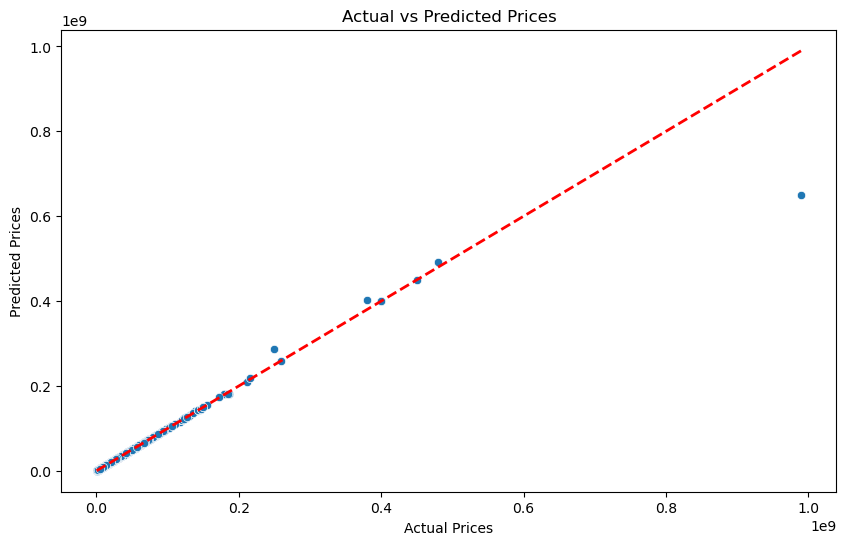

In [346]:
data_model=RandomForestRegressor(max_leaf_nodes=15000, random_state=1)
data_model.fit(OH_Train_X, Train_y)
Predicted=data_model.predict(OH_Val_X)
df_results = pd.DataFrame({'Actual': Val_y, 'Predicted': Predicted})
df_results.to_csv(r'C:\Users\lavan\Desktop\Portfolio Projects\House Pricing Prediction\prediction_3.csv', index=False)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Val_y, y=Predicted)
max_val = max(max(Val_y), max(Predicted))
min_val = min(min(Val_y), min(Predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()